## Stop; It's Keras Time

I'm going to see what I can do with keras. My preliminary googling tells me it's a high-level package that runs on TensorFlow, which allows one to create neural networks with a great deal of abstraction. That is to say, it allows a developer to start building without getting lost in the research articles.

Going to use this reference : elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
np.random.seed(647) # for reproducibility. Using a Toronto are code, to rep my squad

### Loading training data, from MNIST

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)

(60000, 28, 28)


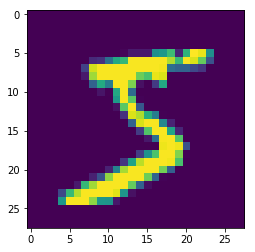

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Beautiful! Now I know how someone writes the letter 5. I think it'd be cool to see a couple of other examples too.

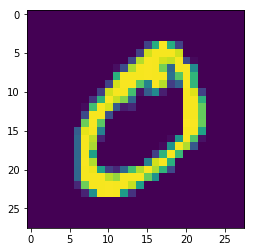

In [5]:
plt.imshow(X_train[1])

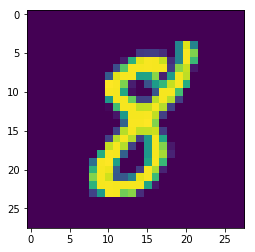

In [6]:
plt.imshow(X_train[41])

Moving on. We work on preprocessing.


In [7]:
X_train = X_train.reshape(X_train.shape[0],  28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

(60000, 28, 28, 1)


In [8]:
print (y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [9]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)
print(Y_train.shape)

(60000, 10)


# Define model architecture
As the meme goes, this is where the fun begins.

In my pursuit of all things neural networks, I think the following code will be most useful. I hope to use this design a simple neural network quickly and easily later on, to investigate how the architecture of a net is best-suited for a given problem

In [21]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
print(model.output_shape)

(None, 26, 26, 32)


In [22]:
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

## Fit model on training data

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 292s - loss: 0.3419 - acc: 0.8951   
Epoch 2/10
60000/60000 [==============================] - 311s - loss: 0.1635 - acc: 0.9527   
Epoch 3/10
60000/60000 [==============================] - 339s - loss: 0.1293 - acc: 0.9631   
Epoch 4/10
60000/60000 [==============================] - 309s - loss: 0.1169 - acc: 0.9669   
Epoch 5/10
60000/60000 [==============================] - 317s - loss: 0.1048 - acc: 0.9695   
Epoch 6/10
60000/60000 [==============================] - 331s - loss: 0.0962 - acc: 0.9732   
Epoch 7/10
60000/60000 [==============================] - 303s - loss: 0.0913 - acc: 0.9753   
Epoch 8/10
60000/60000 [==============================] - 298s - loss: 0.0915 - acc: 0.9754   
Epoch 9/10
60000/60000 [==============================] - 350s - loss: 0.0842 - acc: 0.9764   
Epoch 10/10
45568/60000 [=====================>........] - ETA: 96s - loss: 0.0738 - acc: 0.9789

## Evaluation

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)